Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Q1. Load the dataset 

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.name.nunique()

195

In [6]:
df.drop('name',axis=1,inplace=True)

In [7]:
df.shape

(195, 23)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# we can see a huge differnce between mean, max values of MDVP:Fhi(Hz) max might be an outlier

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [10]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy

In [12]:
# Yes, people with Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [13]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [14]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
X = df.drop('status', axis=1)
y = df.status

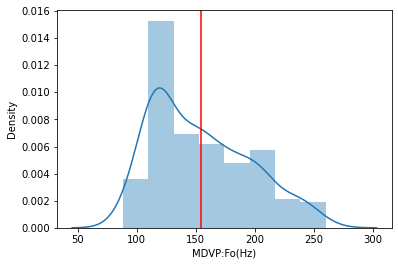

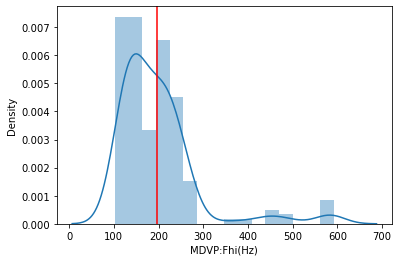

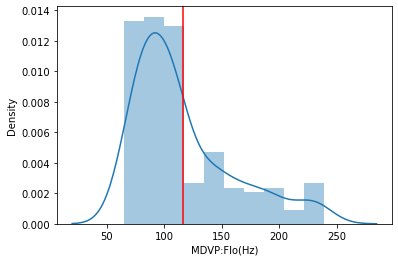

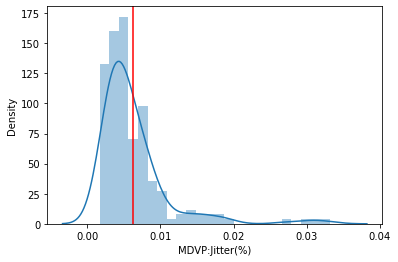

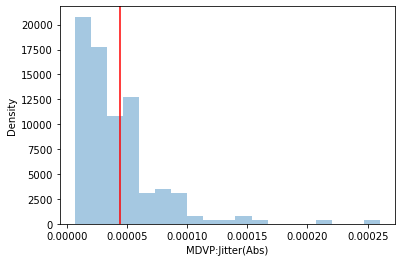

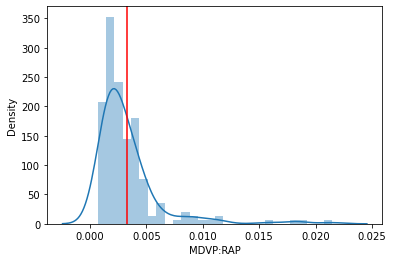

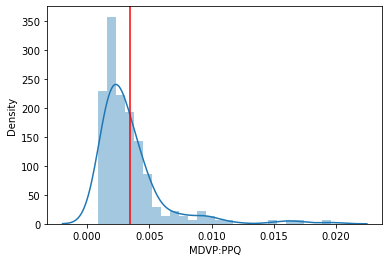

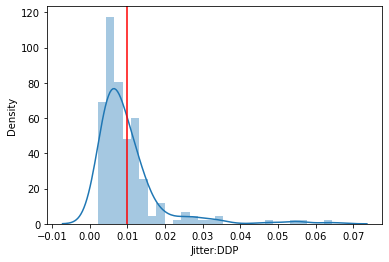

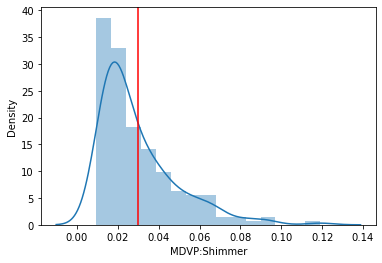

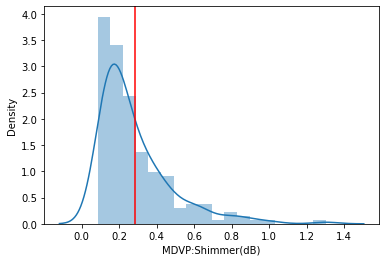

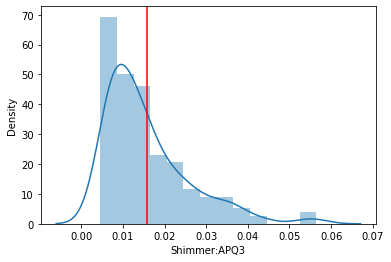

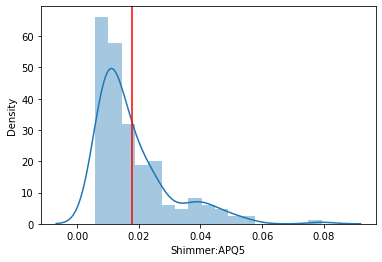

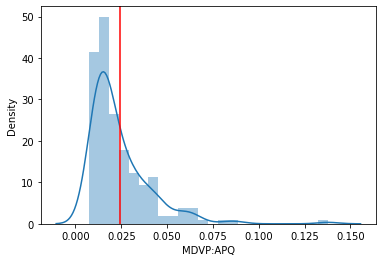

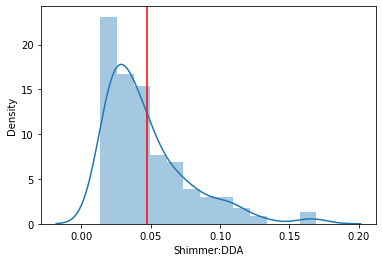

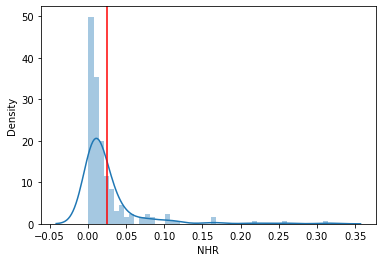

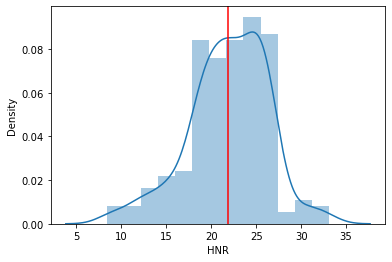

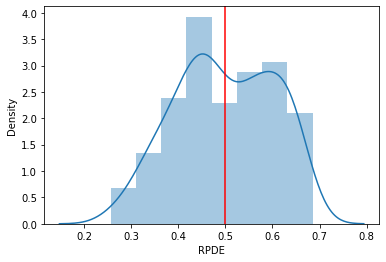

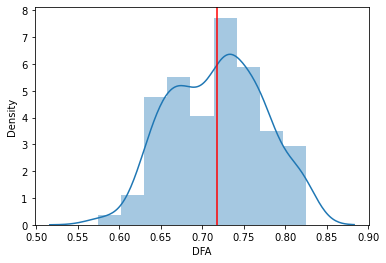

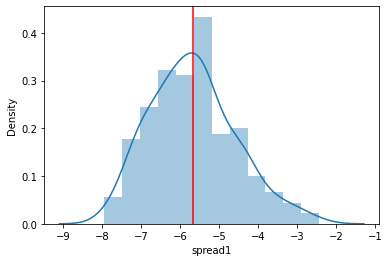

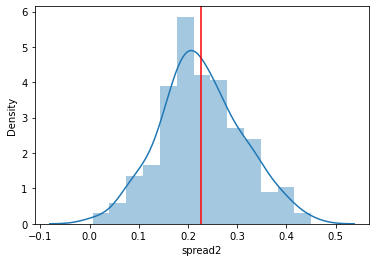

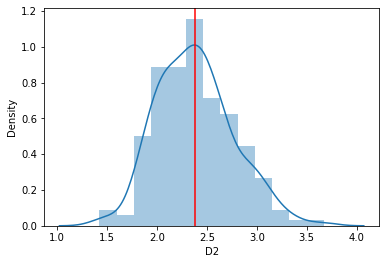

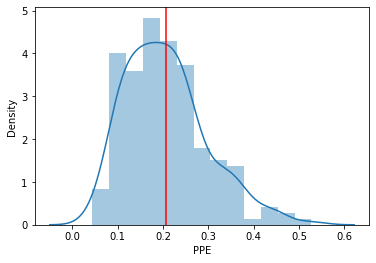

In [16]:
for i in X.columns:
    sns.distplot(X[i])
    plt.axvline(X[i].mean(), color='red', label='Mean')
    plt.show()

In [17]:
#       'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
#       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
#      'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
#      'MDVP:APQ', 'Shimmer:DDA', 'NHR'
#  

In [18]:
for i in X.columns:
    if (X[i].skew()> -0.4) & (X[i].skew()<.04):
        print(i,X[i].skew(),'Fairly Normal Distributed')
    elif X[i].skew()>.04:
        print(i,X[i].skew(),'Right Skewed')
    elif X[i].skew()<-.04:
        print(i,X[i].skew(),'Left Skewed')

MDVP:Fo(Hz) 0.5917374636540784 Right Skewed
MDVP:Fhi(Hz) 2.542145997588398 Right Skewed
MDVP:Flo(Hz) 1.217350448627808 Right Skewed
MDVP:Jitter(%) 3.0849462014441817 Right Skewed
MDVP:Jitter(Abs) 2.6490714165257274 Right Skewed
MDVP:RAP 3.360708450480554 Right Skewed
MDVP:PPQ 3.073892457888517 Right Skewed
Jitter:DDP 3.3620584478857203 Right Skewed
MDVP:Shimmer 1.6664804101559663 Right Skewed
MDVP:Shimmer(dB) 1.999388639086127 Right Skewed
Shimmer:APQ3 1.5805763798815677 Right Skewed
Shimmer:APQ5 1.798697066537622 Right Skewed
MDVP:APQ 2.618046502215422 Right Skewed
Shimmer:DDA 1.5806179936782263 Right Skewed
NHR 4.22070912913906 Right Skewed
HNR -0.5143174975652068 Left Skewed
RPDE -0.14340241379821705 Fairly Normal Distributed
DFA -0.03321366071383484 Fairly Normal Distributed
spread1 0.4321389320131796 Right Skewed
spread2 0.14443048549278412 Right Skewed
D2 0.4303838913329283 Right Skewed
PPE 0.7974910716463578 Right Skewed


In [19]:
df.status = df.status.astype('object')

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

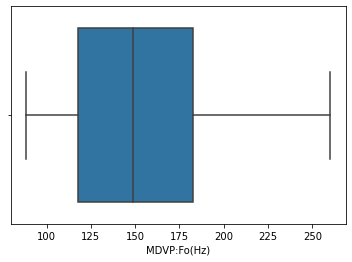

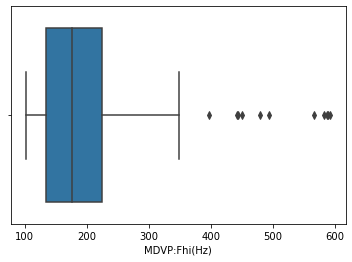

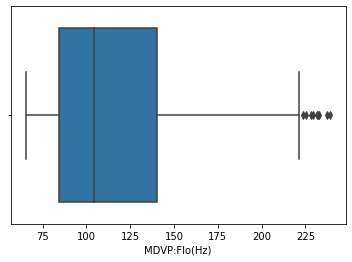

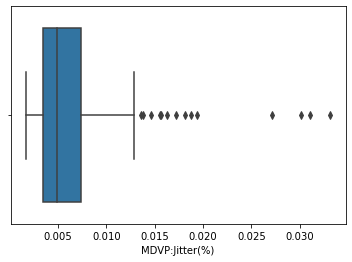

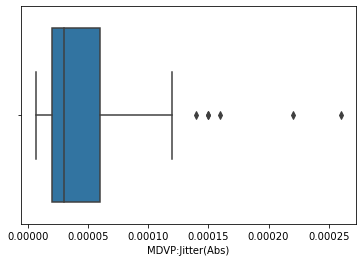

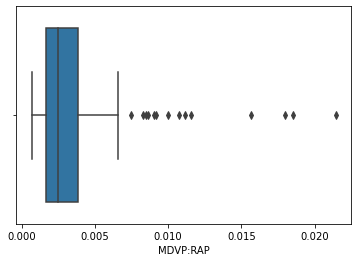

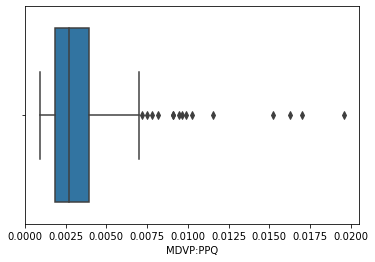

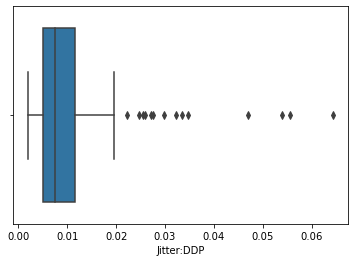

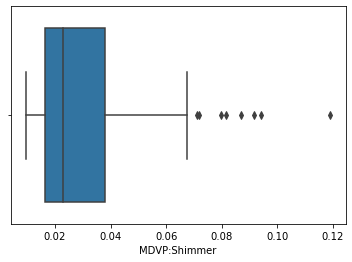

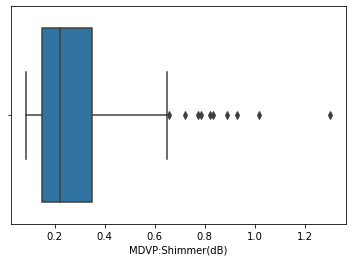

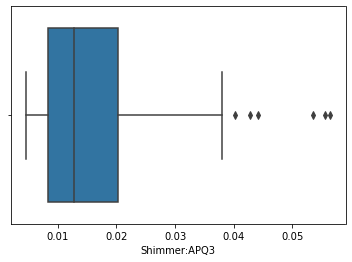

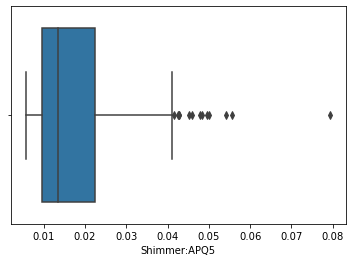

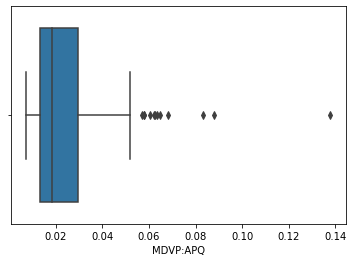

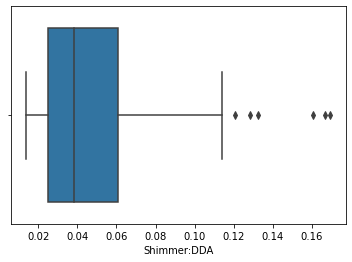

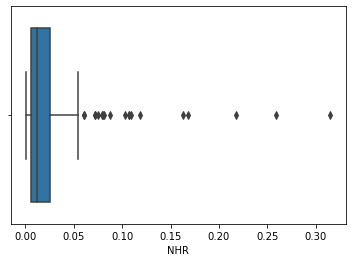

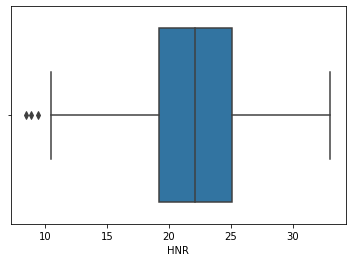

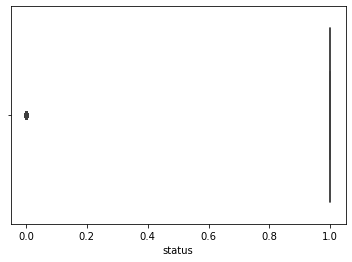

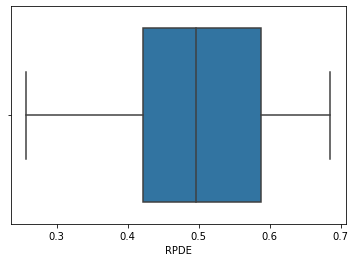

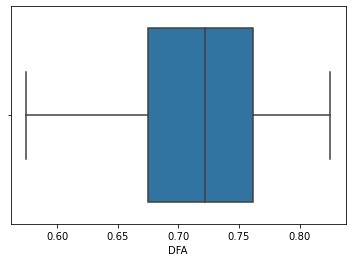

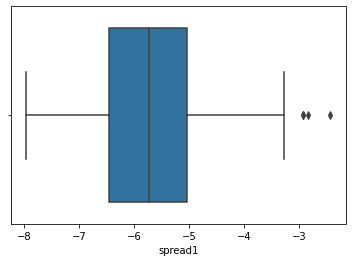

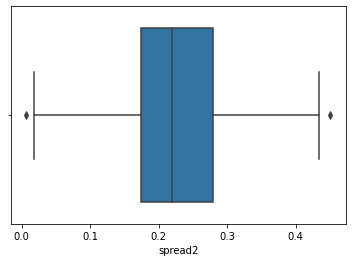

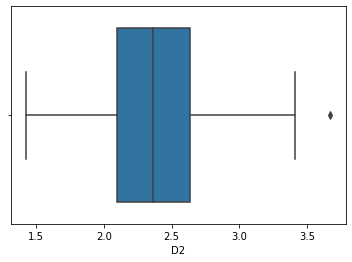

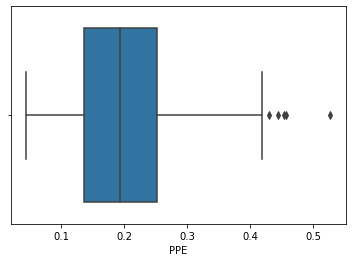

In [20]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [21]:
df1 = pd.DataFrame()

In [22]:
q1=df.quantile(q=0.25)
q3=df.quantile(q=0.75)

iqr=q3-q1

lower_limit = q1-1.5*iqr

upper_limit = q3+1.5*iqr


df1=df[~((df<lower_limit)|(df>upper_limit)).any(axis = 1)]
df1.shape

(148, 23)

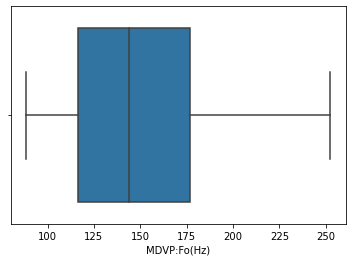

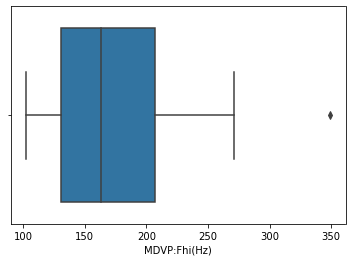

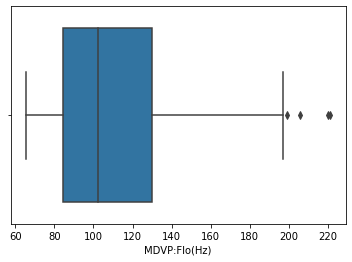

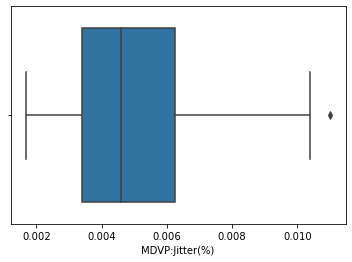

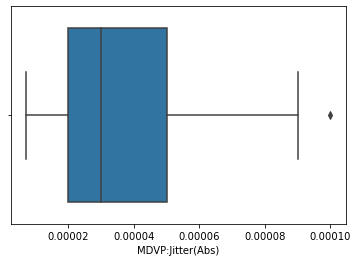

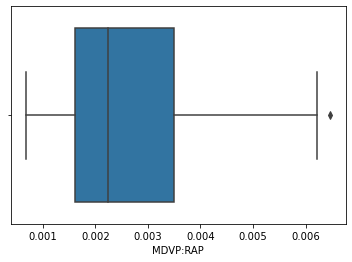

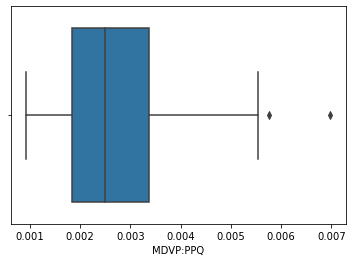

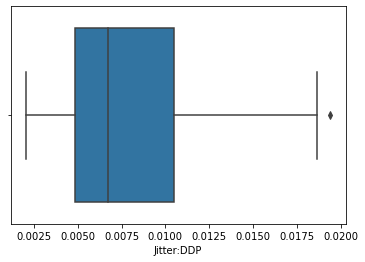

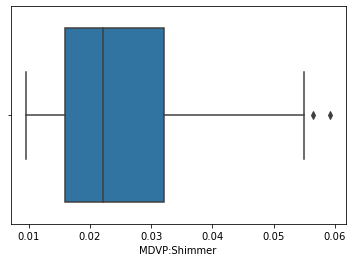

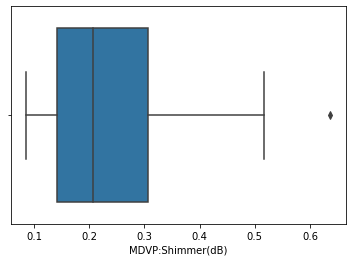

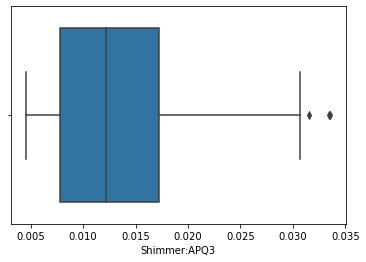

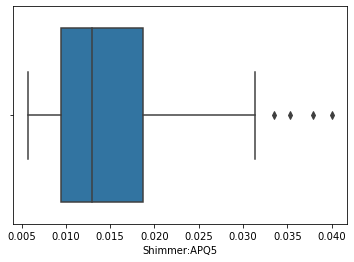

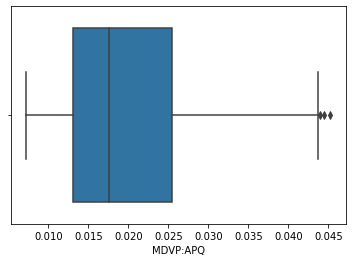

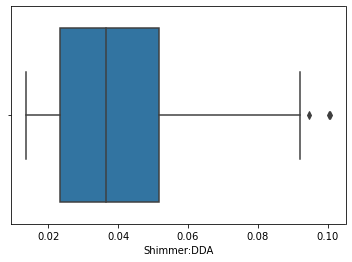

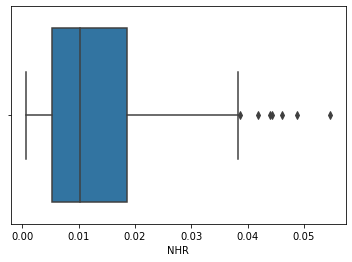

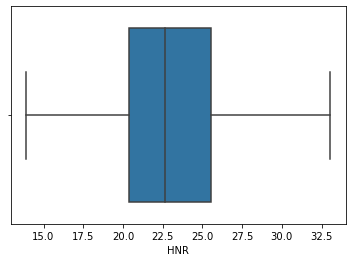

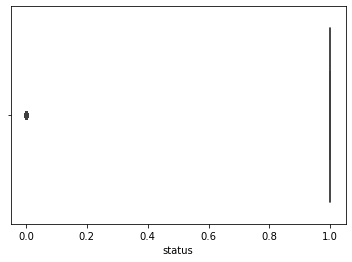

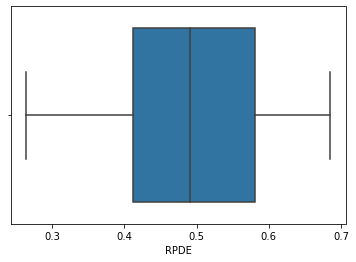

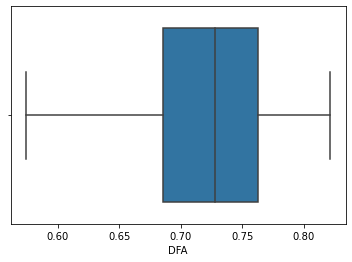

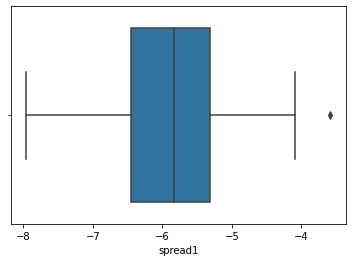

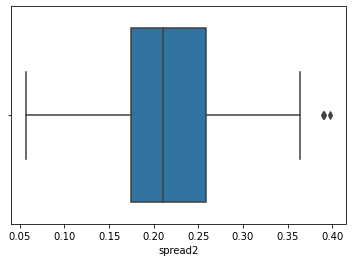

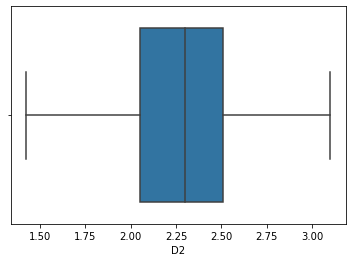

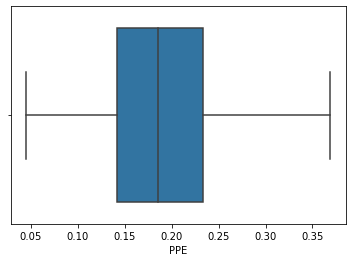

In [23]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

In [24]:
X = df1.drop('status', axis=1)
y = df1.status

In [37]:
y = y.astype('int')

In [38]:
y.value_counts()

1    114
0     34
Name: status, dtype: int64

### Q7. Are there any strong correlations among the independent features?

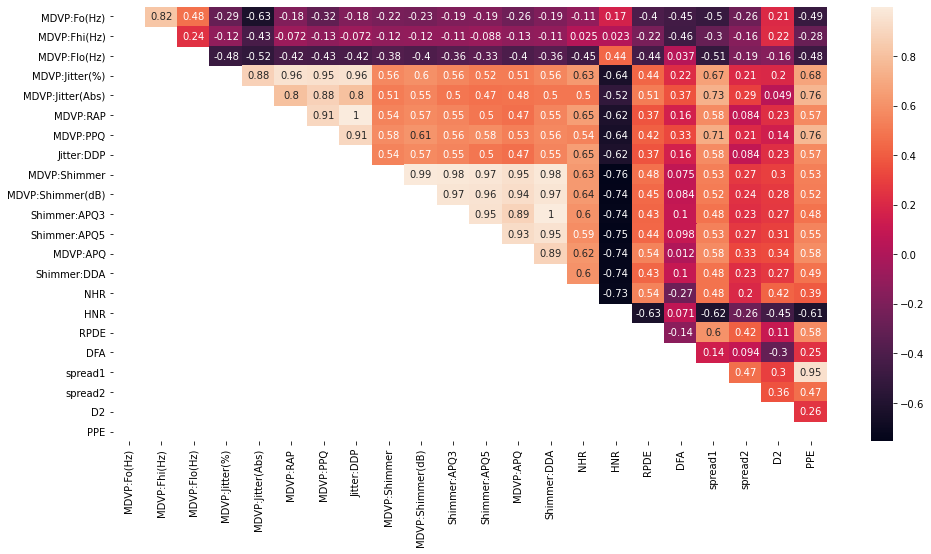

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(),mask=np.tril(X.corr()) ,annot=True)
plt.show()

In [40]:
# (MVDP RAP, Jitter DDP) and (Shimmer DDA, Shimmer APQ3) has high correlation as 1

### Q8. Split dataset into training & test dataset  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

In [42]:
X_train.shape

(118, 22)

In [43]:
X_test.shape

(30, 22)

In [44]:
y_train.shape

(118,)

In [45]:
y_test.shape

(30,)

In [46]:
pd.set_option('max_rows',None)
X_train.head(120)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
158,126.144,154.284,97.543,0.00975,0.000080,0.00593,0.00454,0.01778,0.02852,0.266,0.01500,0.01581,0.02157,0.04499,0.03828,21.534,0.635015,0.627337,-5.070096,0.280091,2.892300,0.249703
95,157.447,163.267,149.605,0.00369,0.000020,0.00201,0.00197,0.00602,0.03272,0.283,0.01813,0.01909,0.02571,0.05439,0.01018,21.693,0.447285,0.705658,-6.247076,0.180528,2.344348,0.164916
107,151.884,157.765,133.751,0.00258,0.000020,0.00115,0.00122,0.00346,0.01450,0.137,0.00633,0.00788,0.01267,0.01898,0.00659,26.833,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306
177,151.737,190.204,129.859,0.00314,0.000020,0.00135,0.00162,0.00406,0.01469,0.132,0.00728,0.00886,0.01230,0.02184,0.00570,24.151,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
176,116.388,129.038,108.970,0.00346,0.000030,0.00169,0.00213,0.00507,0.01725,0.155,0.00874,0.01021,0.01331,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
144,202.544,241.350,164.168,0.00254,0.000010,0.00100,0.00133,0.00301,0.02662,0.228,0.01475,0.01558,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
92,148.272,164.989,142.299,0.00459,0.000030,0.00250,0.00256,0.00750,0.04190,0.383,0.02383,0.02521,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
48,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
10,88.333,112.240,84.072,0.00505,0.000060,0.00254,0.00330,0.00763,0.02143,0.197,0.01079,0.01342,0.01892,0.03237,0.01166,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
31,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,0.00504,0.00641,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


### Q9. Create a default decision tree model using criterion = Entropy 

In [47]:
DT = DecisionTreeClassifier(criterion='entropy')

In [48]:
dt_model = DT.fit(X_train, y_train)

In [53]:
ypred = dt_model.predict(X_train)

In [55]:
print(classification_report(y_train, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        94

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [49]:
ypred = dt_model.predict(X_test)

In [52]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.95      1.00      0.98        20

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [63]:
params = {
    'max_depth' : [2,4,6],
    'min_samples_leaf' : [1,3,5,7]
}

In [64]:
gd = GridSearchCV(estimator=DT, param_grid=params, scoring='accuracy', cv=2, verbose=3, n_jobs=-1)

In [65]:
dt_tuned = gd.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.1s finished


In [66]:
dt_tuned.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [68]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=1)

In [69]:
dt_model = dt.fit(X_train, y_train)

In [70]:
ypred = dt_model.predict(X_test)

In [71]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.74      1.00      0.85        20

    accuracy                           0.77        30
   macro avg       0.87      0.65      0.66        30
weighted avg       0.83      0.77      0.72        30



In [ ]:
# not helpful

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [73]:
rf = RandomForestClassifier()

In [75]:
rf_model = rf.fit(X_train, y_train)

In [76]:
ypred = rf_model.predict(X_test)

In [77]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.87      1.00      0.93        20

    accuracy                           0.90        30
   macro avg       0.93      0.85      0.88        30
weighted avg       0.91      0.90      0.89        30



In [78]:
params = {
    'n_estimators':[2,5,8,4]
}

In [79]:
gd = GridSearchCV(estimator=rf,param_grid=params, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

In [80]:
gd_dt = gd.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished


In [81]:
gd_dt.best_params_

{'n_estimators': 5}

In [86]:
rf = RandomForestClassifier(n_estimators=5)

In [87]:
rf_model_tuned = rf.fit(X_train, y_train)

In [88]:
ypred_tuned = rf_model_tuned.predict(X_test)

In [89]:
print(classification_report(y_test,ypred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.79      0.95      0.86        20

    accuracy                           0.80        30
   macro avg       0.81      0.72      0.74        30
weighted avg       0.81      0.80      0.78        30

